In [0]:
import torch
import torchvision

In [0]:
n_epochs = 10
batch_size = 64
learning_rate = 0.01
log_interval = 10

random_seed = 1
torch.manual_seed(random_seed)

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

In [0]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [0]:
example_data.shape

torch.Size([64, 1, 28, 28])

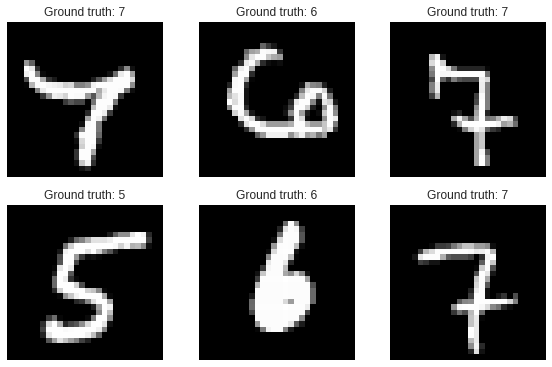

In [0]:
import matplotlib.pyplot as plt 

fig = plt.Figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation=None)
  plt.title("Ground truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig
plt.show()

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
class Net(nn.Module):
  def __init__(self, batch_size):
    super(Net,self).__init__() 
    self.batch_size = batch_size
    
    self.layer1 = nn.Linear(in_features=784, out_features=512)
    self.layer2 = nn.Linear(in_features=512, out_features=200)
    self.layer3 = nn.Linear(in_features=200, out_features=200)
    self.layer4 = nn.Linear(in_features=200, out_features=10)
  
  def forward(self, x):
    x = x.view(-1,784)
    
    x = self.layer1(x)
    x = F.relu(x)
    x = self.layer2(x)
    x = F.relu(x)
    x = self.layer3(x)
    x = F.relu(x)
    x = self.layer4(x)
    x = F.relu(x)
    
    x = F.softmax(x,dim=1)
    
    return x

In [0]:
network = Net(batch_size)
optimizer = optim.SGD(network.parameters(), lr = learning_rate)

In [0]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [0]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [0]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.cross_entropy(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [0]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3028, Accuracy: 801/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303420
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.304271
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.302933
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.302867
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.301916
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.302889
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.302440
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.302734
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.302136
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.302913
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.302169
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.301539
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.303211
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.302916
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.302808
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.302698
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.302221
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.302537
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.301834
Train Epoch: 1 [12160/6

Text(0, 0.5, 'negative log likelihood loss')

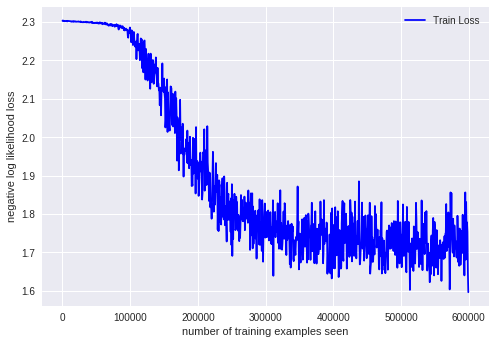

In [0]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')